# Задание #4 Sklearn и основы ML

## Инструменты и ресурсы для выполнения задания

### Библиотеки Python

* [Sklearn](http://scikit-learn.org/stable/).
  - [Introduction to machine learning in Python with scikit-learn](http://www.dataschool.io/machine-learning-with-scikit-learn/).
* [Kaggle Python Tutorial on Machine Learning](https://campus.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning).

### Ресурсы по изучению ML
* [ML from Stanford University](https://www.coursera.org/learn/machine-learning/). Самый базовый курс.
* [Введение в машинное обучение](https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/). Курс професссора Воронцова К.В. на coursera.org. Существенно более полный, чем курс Andrew Ng, но сокращен по сравнению с курсом, читаемым в ШАД.

![what I really do](https://pp.vk.me/c629431/v629431882/2a1a8/7EAKCA_FtnA.jpg)
  
## Разминка
1. Загрузите набор данных [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase). *Сами данные находятся по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data. Вам также потребуются имена признаков, которые доступны по ссылке http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names*.

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [83]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

In [84]:
df = pd.read_csv('./test_price/spam.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

2. Ответьте на следующие воросы:
  * Сколько примеров писем в датасете?

In [85]:
df.shape[0]

4601

  * Какова доля спама?

In [86]:
spam_pr = round(df['class'].value_counts()[1] / df['class'].value_counts().sum(), 2)
f'Proportion of spam: {spam_pr}'

'Proportion of spam: 0.39'

  * Какие характерные группы признаков представлены в наборе?

* процент слов в электронном письме, которые соответствуют конкретному слову
* процент символов в электронном письме, которые соответствуют конкретному символу
* средняя длина непрерывных последовательностей заглавных букв
* длина самой длинной непрерывной последовательности заглавных букв
* сумма длины непрерывных последовательностей заглавных букв
* общее количество заглавных букв в электронном письме
* атрибут, показывающий спам это или нет

Информация об атрибутах:

Последний столбец «spambase.data» указывает, считалось ли электронное письмо спамом (1) или нет (0), т.е. нежелательной электронной почтой. Большинство атрибутов указывают, часто ли встречалось определенное слово или символ в сообщении электронной почты. Атрибуты (55-57) измеряют длину последовательностей последовательных заглавных букв. 

Определения атрибутов:

48 первых колонок word_freq_WORD = процент слов в электронном письме, которые соответствуют WORD, т.е. 100 * (количество раз, когда WORD появляется в электронном письме) / общее количество слов в электронном письме. 
WORD в данном случае является любая строка буквенно-цифровых символов, ограниченная небуквенно-цифровыми символами или концом строки.

6 слелущих колонок char_freq_CHAR = процент символов в электронном письме, который соответствует CHAR, т.е. 100 * (количество вхождений CHAR) / общее количество символов в электронном письме.

1 атрибут типа capital_run_length_average = средняя длина непрерывных последовательностей заглавных букв

1 атрибут типа capital_run_length_longest = длина самой длинной непрерывной последовательности заглавных букв

1 атрибут типа capital_run_length_total = сумма длины непрерывных последовательностей заглавных букв = общее количество заглавных букв в электронном письме

1 атрибут класса {0,1} типа спам = означает, считалось ли электронное письмо спамом (1) или нет (0).

3. Подготовьте два разбиения исходного набора данных на тестовую (test) и обучающую (train) выборки:
  * Первые 3000 писем отдайте на обучение, а оставшиеся на тест.
  * Сделайте случайное разбиение в тех же пропорциях.

In [87]:
X = df.drop('class', axis=1)
y = df['class']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3000, shuffle=False)

In [89]:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, train_size=3000)
X_test_random.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
2299,0.00,0.0,1.23,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.000,0.139,0.000,0.279,0.000,0.0,1.736,10,66
893,0.00,0.0,0.00,0.0,0.00,0.32,0.0,0.00,0.00,0.00,...,0.0,0.180,0.270,0.045,0.000,0.000,0.0,2.000,14,178
3999,0.07,0.0,0.23,0.0,0.15,0.00,0.0,0.07,0.00,0.07,...,0.0,0.011,0.143,0.000,0.000,0.044,0.0,2.442,26,591
2349,0.00,0.0,1.61,0.0,0.00,0.00,0.0,0.00,1.61,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.769,8,23
3218,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.000,0.315,0.000,0.000,0.630,0.0,3.083,12,37


4. Для первого из разбиений обучите алгоритм sklearn.tree.DecisionTreeClassifier на обучающей выборке.

In [90]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

5. Замерьте метрики качества recall, precision, f1, accuracy на тестовой выборке из первого разбиения.

In [91]:
rc_score = recall_score(y_test, y_pred, average= 'macro', zero_division=0)
pr_score = precision_score(y_test, y_pred, average='macro', zero_division=0)
f_score = f1_score(y_test, y_pred, zero_division=0)

print(f"recall score: {rc_score}, precision_score: {pr_score}, f1_score: {f_score}")

recall score: 0.3928794503435353, precision_score: 0.5, f1_score: 0.0


6. Повторите пункты 4. и 5. для второго разбиения.

In [92]:
clf = DecisionTreeClassifier()
clf.fit(X_train_random,y_train_random)
y_pred_random = clf.predict(X_test_random)

In [93]:
rc_score = recall_score(y_test_random, y_pred_random, average='micro', zero_division=0)
pr_score = precision_score(y_test_random, y_pred_random, average='macro', zero_division=0)
f_score = f1_score(y_test_random, y_pred_random, zero_division=0)

print(f"recall score: {rc_score}, precision_score: {pr_score}, f1_score: {f_score}")

recall score: 0.9188007495315428, precision_score: 0.9156295288081155, f1_score: 0.8976377952755904


In [94]:
report = classification_report(y_test, y_pred, target_names=['Not spam', 'Spam'])
print(report)

              precision    recall  f1-score   support

    Not spam       1.00      0.79      0.88      1601
        Spam       0.00      0.00      0.00         0

    accuracy                           0.79      1601
   macro avg       0.50      0.39      0.44      1601
weighted avg       1.00      0.79      0.88      1601



C:\Users\Ladyk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ladyk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ladyk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [95]:
report_random = classification_report(y_test_random, y_pred_random, target_names=['Not spam', 'Spam'])
print(report_random)

              precision    recall  f1-score   support

    Not spam       0.93      0.93      0.93       964
        Spam       0.90      0.89      0.90       637

    accuracy                           0.92      1601
   macro avg       0.92      0.91      0.92      1601
weighted avg       0.92      0.92      0.92      1601



7. Объясните разницу в результатах. **Далее используйте только второе (случайное) разбиение.**

В случае неравных классов нужно подбирать баланс классов для обучения и метрику, которая будет корректно отражать качество классификации

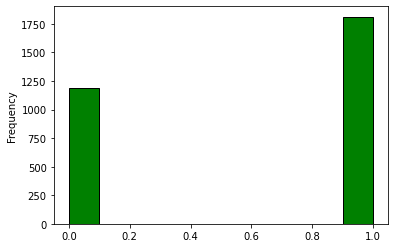

In [96]:
y_train.plot.hist(color = 'green', edgecolor = 'black');

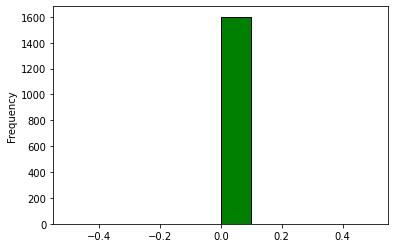

In [97]:
y_test.plot.hist(color = 'green', edgecolor = 'black');

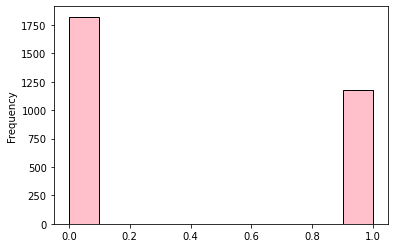

In [98]:
y_train_random.plot.hist(color = 'pink', edgecolor = 'black');

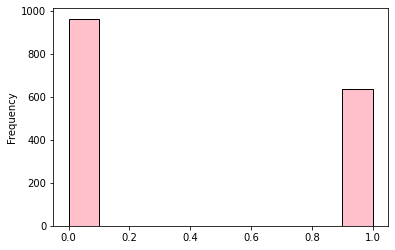

In [99]:
y_test_random.plot.hist(color = 'pink', edgecolor = 'black');

Как можно заметить в первом разбиении классы распределены неравномерно, в тестовой выборке отсутсвует спам письма, после случайного перемешивания, можно увидеть для разбиения с перемешиванием баланс классов приблизительно равеен для трейновой и тестовой выборки

8. Для модели, обученной на случайном разбиении, выведите оценку информативности признаков (feature importance).

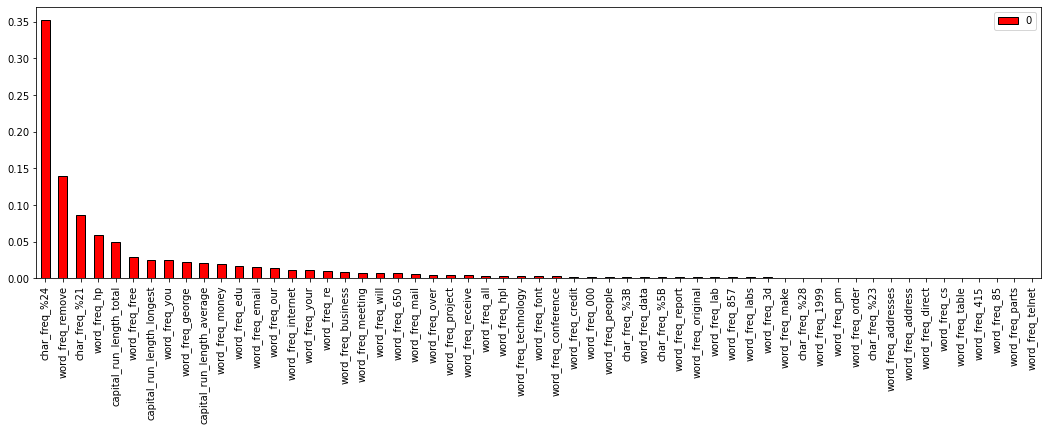

In [100]:
features = clf.feature_importances_
df_features = pd.DataFrame(features, index=df.columns[:-1]).sort_values(by = 0, ascending = False)
df_features.plot.bar(color = 'red', edgecolor = 'black', figsize=(18,5));

9. Предложите способ, как можно использовать данную оценку?

По данной оценке можно понять, какие слова действительно чаще встречаются в письмах со спамом, или же что более важно среднее количество заглавных букв, ничего удивительного если слово free часто встречается в спам рассылках где предлагается возможно чт то попробовать бесплатно, также важно наличие заглавных букв, возможно, для привлечения внимания в личном кабинете при разборе почты получателем.
При построении модели машинного обучения не всегда понятно, какие из признаков действительно для неё важны, а какие являются избыточными. Удаление избыточных признаков позволяет лучше понять данные, а также сократить время настройки модели, улучшить её точность и облегчить интерпретируемость. 
Иногда эта задача и вовсе может быть самой значимой, например, нахождение оптимального набора признаков может помочь расшифровать механизмы, лежащие в основе исследуемой проблемы.
Таким образом можно отбросить неважные фичи и ускорить обучние не сильно потеряв в эффективности или же наоборот увеличить ее

10. Предложите способ, которым решающее дерево способно дать такую оценку.

Для каждого дерева решений Scikit-learn вычисляет важность узлов, используя Gini Importance, предполагая наличие только двух дочерних узлов.
Метод compute_feature_importances:
https://github.com/scikit-learn/scikit-learn/blob/18cdaa69c14a5c84ab03fce4fb5dc6cd77619e35/sklearn/tree/_tree.pyx#L1056

11. Обучите алгоритм sklearn.neighbors.KNeighborsClassifier на обучающей выборке и произведите оценку качества модели на тестовой выборке.

In [101]:
clf = KNeighborsClassifier()
clf.fit(X_train_random,y_train_random)
y_pred_random = clf.predict(X_test_random)

In [102]:
rc_score = recall_score(y_test_random, y_pred_random, average='micro')
pr_score = precision_score(y_test_random, y_pred_random, average='macro')
f_score = f1_score(y_test_random, y_pred_random)

print(f"recall score: {rc_score}, precision_score: {pr_score}, f1_score: {f_score}")

recall score: 0.7820112429731418, precision_score: 0.7730389196360504, f1_score: 0.7210231814548361


In [103]:
report_random = classification_report(y_test_random, y_pred_random, target_names=['Not spam', 'Spam'])
print(report_random)

              precision    recall  f1-score   support

    Not spam       0.81      0.83      0.82       964
        Spam       0.73      0.71      0.72       637

    accuracy                           0.78      1601
   macro avg       0.77      0.77      0.77      1601
weighted avg       0.78      0.78      0.78      1601



12. Какая из обученных моделей лучше?

В данном случае решающее дерево показывает результат выше, чем метод ближайших соседей

13. Способен ли KNN оценить информативность признаков?

Важность фич не определена для алгоритма классификации KNN. Здесь нет простого способа вычислить признаки, ответственные за классификацию.

14. Произведите нормировку обучающей и тестовой выборок.

In [104]:
X_train_random.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
1262,0.44,0.0,0.88,0.0,0.44,1.32,0.00,0.00,0.00,0.0,...,0.0,0.222,0.000,0.0,0.444,0.370,0.0,2.413,16,140
2470,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.562,5,25
3312,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,5.26,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,2.058,11,35
2687,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.0,3.222,9,29
920,0.00,0.0,0.32,0.0,0.64,0.64,0.32,0.64,0.00,0.0,...,0.0,0.000,0.112,0.0,0.000,0.168,0.0,1.494,10,139


In [105]:
norm = preprocessing.normalize(X_train_random, axis=0)
X_train_random = pd.DataFrame(norm,columns = X_train_random.columns)
X_train_random.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.023885,0.0,0.027359,0.0,0.010995,0.090612,0.000000,0.000000,0.000000,0.0,...,0.0,0.015482,0.000000,0.0,0.010576,0.024954,0.0,0.001181,0.001248,0.003575
1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000765,0.000390,0.000638
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.331946,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.001007,0.000858,0.000894
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.001577,0.000702,0.000740
4,0.000000,0.0,0.009949,0.0,0.015992,0.043933,0.015271,0.027908,0.000000,0.0,...,0.0,0.000000,0.006164,0.0,0.000000,0.011330,0.0,0.000731,0.000780,0.003549


15. Повторите эксперимент с KNN на нормированных данных. Объясните разницу в результатах.

In [106]:
clf = KNeighborsClassifier()
clf.fit(X_train_random,y_train_random)
y_pred_random = clf.predict(X_test_random)

In [107]:
rc_score = recall_score(y_test_random, y_pred_random, average='micro')
pr_score = precision_score(y_test_random, y_pred_random, average='macro')
f_score = f1_score(y_test_random, y_pred_random)

print(f"recall score: {rc_score}, precision_score: {pr_score}, f1_score: {f_score}")

recall score: 0.44409743910056215, precision_score: 0.7019456427955133, f1_score: 0.5883441258094357


In [108]:
report_random = classification_report(y_test_random, y_pred_random, target_names=['Not spam', 'Spam'])
print(report_random)

              precision    recall  f1-score   support

    Not spam       0.99      0.08      0.14       964
        Spam       0.42      1.00      0.59       637

    accuracy                           0.44      1601
   macro avg       0.70      0.54      0.37      1601
weighted avg       0.76      0.44      0.32      1601



Если использовать нормализованные данные, расстояния между точками данных, будут отличаться от тех, которые использовали для ненормализованных данных. 
Поскольку kNN обычно использует евклидово расстояние для нахождения k ближайших точек из любой заданной точки, использование нормализованных объектов может выбрать другой набор k соседей, чем тот, который был выбран при использовании ненормализованных объектов, отсюда и разница в точности.

16. Повторите эксперимент с решающим деревом на нормированных данных. Сравните результаты с теми, которые получены на ненормированных данных. Объясните подобное поведение.

In [109]:
clf = DecisionTreeClassifier()
clf.fit(X_train_random,y_train_random)
y_pred_random = clf.predict(X_test_random)

In [110]:
rc_score = recall_score(y_test_random, y_pred_random, average='micro')
pr_score = precision_score(y_test_random, y_pred_random, average='macro')
f_score = f1_score(y_test_random, y_pred_random)

print(f"recall score: {rc_score}, precision_score: {pr_score}, f1_score: {f_score}")

recall score: 0.3747657713928795, precision_score: 0.4010872131799484, f1_score: 0.4544959128065395


In [111]:
report_random = classification_report(y_test_random, y_pred_random, target_names=['Not spam', 'Spam'])
print(report_random)

              precision    recall  f1-score   support

    Not spam       0.45      0.19      0.27       964
        Spam       0.35      0.65      0.45       637

    accuracy                           0.37      1601
   macro avg       0.40      0.42      0.36      1601
weighted avg       0.41      0.37      0.34      1601



Единичные деревья решений могут быть нестабильными, поскольку небольшие отклонения в данных могут привести к созданию совершенно другого дерева. Эта проблема устраняется путем использования деревьев решений в ансамбле.

17. Пропорции разбиения на данный момент выбраны безосновательно. Найдите оптимальные пропорции разбиения на train и test. Для этого необходимо перебрать значения пропорции разбиения по сетке, для каждого значения сгенерировать большое число разбиений и на каждом посчитать ошибку (с точки зрения выбранной метрики, например, f1), далее строится график зависимости дисперсии величины ошибки от пропорции разбиения, пропорция разбиения выбирается из области наименьшей дисперсии ошибки. Выберите метрику и постройте график зависимости дисперсии ошибки от пропорции разбиения.

In [112]:
import numpy as np

clf = DecisionTreeClassifier()
score = []
pr = []
for test_size in range(10,40,3):  
    f_score = []
    k_folds = 5
    pr.append(test_size/100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100)
    for fold in range(k_folds): 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size/100)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f_score.append(f1_score(y_test, y_pred))
    score.append(round(np.array(f_score).mean(),3)) 
    print(f'For test test_size: {test_size/100} mean f1score: {score[-1]}')

For test test_size: 0.1 mean f1score: 0.903
For test test_size: 0.13 mean f1score: 0.862
For test test_size: 0.16 mean f1score: 0.904
For test test_size: 0.19 mean f1score: 0.902
For test test_size: 0.22 mean f1score: 0.902
For test test_size: 0.25 mean f1score: 0.896
For test test_size: 0.28 mean f1score: 0.902
For test test_size: 0.31 mean f1score: 0.882
For test test_size: 0.34 mean f1score: 0.886
For test test_size: 0.37 mean f1score: 0.87


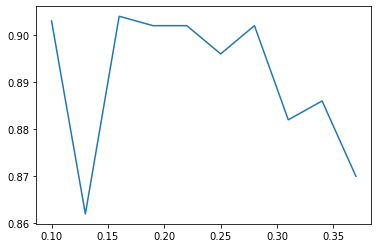

In [113]:
import matplotlib.pyplot as plt
plt.plot(pr,score)
plt.show()

18. Однократное разбиение выборки на train и test не является достаточно хорошим методом с точки зрения оценки качества моделей. На практике используется многократное разбиение или т.н. Cross Validation. Получите оценки качества для решающего дерева и KNN, используя Cross Validation. *Существует несколько типов Cross Validation. Выберите один из них и обоснуйте свой выбор.*

In [114]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
ss = ShuffleSplit(n_splits=5, random_state=0)
skf = StratifiedKFold(n_splits=2)

cvs_types = [kf, ss, skf]

In [115]:
clf = DecisionTreeClassifier()

for cv in cvs_types:
    dtree_results = cross_validate(clf, X, y, cv=cv, 
                                   scoring = 'f1_macro')


    result = round(dtree_results['test_score'].mean(),3)
    print(f'cv: {cv}, result:{result}')

cv: KFold(n_splits=10, random_state=1, shuffle=True), result:0.908
cv: ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=None), result:0.909
cv: StratifiedKFold(n_splits=2, random_state=None, shuffle=False), result:0.872


In [116]:
clf = KNeighborsClassifier()
for cv in cvs_types:
    knn_results = cross_validate(clf, X, y, cv=cv, 
                               scoring = 'f1_macro')

    result = round(knn_results['test_score'].mean(),3)
    print(f'cv: {cv}, result: {result}')

cv: KFold(n_splits=10, random_state=1, shuffle=True), result: 0.799
cv: ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=None), result: 0.796
cv: StratifiedKFold(n_splits=2, random_state=None, shuffle=False), result: 0.739


19. На данный момент параметры алгоритмов KNN и Decision Tree выбраны наугад. Для одбора параметров используется т.н. Greed Search. 
  - Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе.
  - Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания.

In [117]:
params = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7,9,11,13],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1,3,5,7,9]
}

dts = DecisionTreeClassifier()

clf = GridSearchCV(
    estimator=dts,
    param_grid=params,
    scoring = ('f1_macro'),
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_train, y_train))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9649501588430882


In [118]:
params = {
    'n_neighbors': [3,5,7,9,11,13,15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring = ('f1_macro'),
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_train, y_train))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.9996400663082814
